Import i instalacja potrzebnych pakietów

In [ ]:
import os
! pip install kagglehub
! pip install pandas
! pip install matplotlib
! pip install seaborn

import pandas as pd
import seaborn as sns
import kagglehub
import matplotlib.pyplot as plt



Wprowadzamy plik CSV

In [2]:
path = kagglehub.dataset_download("zusmani/uberdrives")

uber_data=pd.read_csv(os.path.join(path,'My Uber Drives - 2016.csv'))
pd.set_option('display.width',500)


Wstępny wgląd w dane.

In [3]:
uber_data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber_data.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


Pozbywamy się niepotrzebnego ostatniego wiersza.

In [5]:
uber_data=uber_data[:-1]

Formatujemy daty.

In [6]:
uber_data['START_DATE*']=pd.to_datetime(
    uber_data['START_DATE*'],
    format='%m/%d/%Y %H:%M',
    errors='coerce'
)
uber_data['END_DATE*']=pd.to_datetime(
    uber_data['END_DATE*'],
    format='%m/%d/%Y %H:%M',
    errors='coerce'
)


Mozna zauważyc, że niektóre wiersze kolumn 'START' i 'STOP' zawierają znaki '?', po krótkiej analizie, stwierdzono, że znaki te można zastąpić literami 'a'. Wtedy wartości zgadzają się z nazwami miast. Warto także usunąć '*', z nazw kolumn.

In [7]:
uber_data=uber_data.rename(columns={
    uber_data.columns[0]:'START_DATE',
    uber_data.columns[1]:'END_DATE',
    uber_data.columns[2]:'CATEGORY',
    uber_data.columns[3]:'START',
    uber_data.columns[4]:'STOP',
    uber_data.columns[5]:'MILES',
    uber_data.columns[6]:'PURPOSE',
})
uber_data['START']=uber_data['START'].replace({"\?":"a"},regex=True)
uber_data['START']=uber_data['START'].replace({"\?":"a"},regex=True)

Można zwizualizować cele podróży dla lepszej analizy.

<Axes: xlabel='count', ylabel='PURPOSE'>

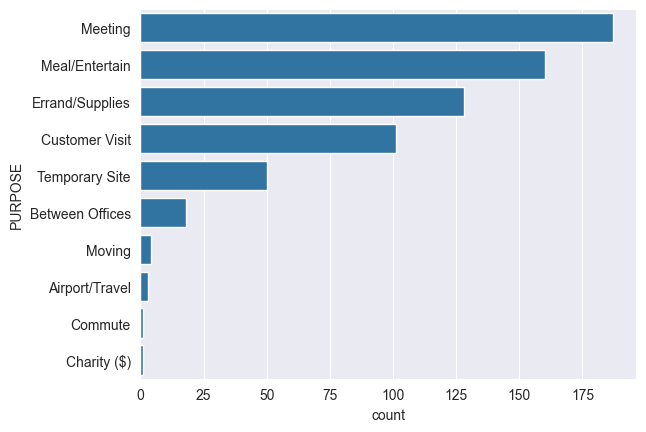

In [8]:
sns.countplot(y='PURPOSE',data=uber_data, order=uber_data['PURPOSE'].value_counts().index)

Jak można zauważyć większość podróży związana jest z różnymi spotkaniami, a także z wykonywaniem różnych zadań/dostaw. Można spekulować, że większość podróży będzie zaliczona do kategorii biznesowej.

<Axes: xlabel='count', ylabel='CATEGORY'>

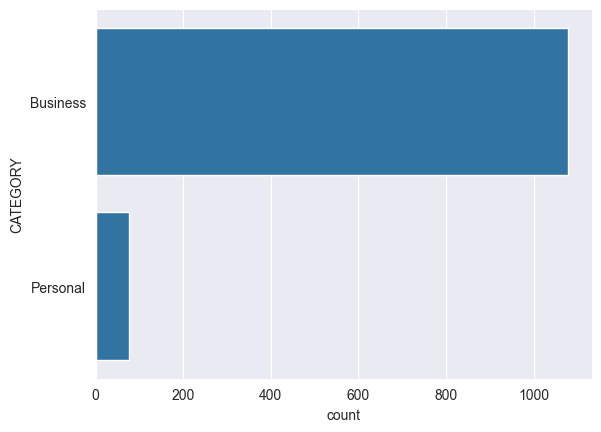

In [9]:
sns.countplot(y='CATEGORY',data=uber_data)

Jak widać przewidywania są zgodne, przeważająca część przejazdów była w celach biznesowych. Nawet pomimo, że drugi najczęściej występujący powód przejazdu to rozrywka/posiłek to i tak rzadko był w celach prywatnych, możę to nam sugerować, że użytkownik pracuje w branży, która nastawiona jest na częste spotkania z klientami.

<Axes: xlabel='godziny', ylabel='Liczba Wystąpien'>

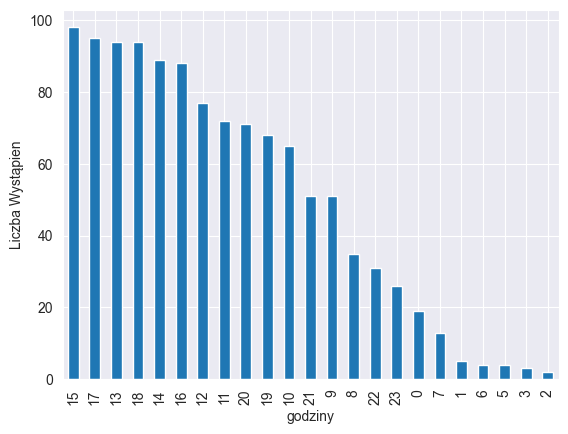

In [10]:
uber_data['START_DATE'].dt.hour.value_counts().plot(kind='bar',xlabel='godziny',ylabel='Liczba Wystąpien')

Jak widać większość podróży odbywa się w godzinach lunchowych/wczesno kolacyjnych, gdzie wtedy klient może być jeszcze w pracy. Potwierdza to nasze spekulacje co do rodzaju grona do jakiego należy użytkownik .

             START  STOP
Cary           201   203
Morrisville     85    84
Whitebridge     68    65
Islamabad       57    58


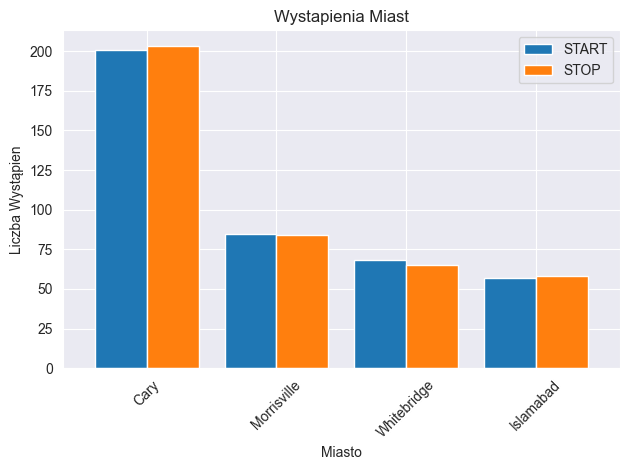

In [11]:

start_count=uber_data['START'].value_counts().nlargest(5)
stop_count=uber_data['STOP'].value_counts().nlargest(5)

all_count=pd.Index(start_count.index).union(stop_count.index)
all_df=pd.DataFrame({
    'START': start_count,
    'STOP': stop_count,
},index=all_count).fillna(0)
all_df=all_df.drop('Unknown Location')
print(all_df.head())


all_df.plot(kind='bar',width=0.8)
plt.xlabel('Miasto')
plt.ylabel('Liczba Wystąpien')
plt.title('Wystapienia Miast')
plt.xticks(rotation=45)
plt.tight_layout()



Możemy zalożyc, że osoba korzystająca z aplikacji Uber, mieszka bądź pracuje w miejscowości 'Cary'.

Jak widać, z pozornie podstawowych i nic nie pokazujących danych, można wywnioskować dużo informacji o kliencie. Może to pomóc w analizie zachowań użytkownika by następnie rekomendować mu lepsze treści, dopasowanie pod niego.